# **End-to-End Machine Learning Project**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# 📖 TABLE OF CONTENTS

- [Main Steps of a Machine Learning Project](#Main-Steps-of-a-Machine-Learning-Project)
- [Look at the Big Picture](#Look-at-the-Big-Picture)
  - [Frame the Problem](#Frame-the-Problem)
  - [Select a Performance Measure](#Select-a-Performance-Measure)
  - [Check the Assumptions](#Check-the-Assumptions)
- [Get the Data](#Get-the-Data)
  - [Download the Data](#Download-the-Data)
  - [Take a Quick Look at the Data Structure](#Take-a-Quick-Look-at-the-Data-Structure)
  - [Create a Test Set](#Create-a-Test-Set)
    - [Random Split without seed](#Random-Split-without-seed)
    - [Random Split with seed](#Random-Split-with-seed)
    - [Deterministic Split using Hashing](#Deterministic-Split-using-Hashing)
    - [Stratified Sampling](#Stratified-Sampling)
- [Explore and Visualize the Data to Gain Insights](#Explore-and-Visualize-the-Data-to-Gain-Insights)
  - [Visualizing Geographical Data](#Visualizing-Geographical-Data)
  - [Look for Correlations](#Look-for-Correlations)
  - [Experiment with Attribute Combinations](#Experiment-with-Attribute-Combinations)
- [Prepare the Data for Machine Learning Algorithms](#Prepare-the-Data-for-Machine-Learning-Algorithms)
  - [Clean the Data](#Clean-the-Data)
    - [Scikit-Learn Design](#Scikit-Learn-Design)
  - [Handling Text and Categorical Attributes](#Handling-Text-and-Categorical-Attributes)
  - [Feature Scaling and Transformation](#Feature-Scaling-and-Transformation)
- [References](#References)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Main Steps of a Machine Learning Project

Main steps of a machine learning project are:
* Look at the big picture.
* Get the data.
* Explore and visualize the data to gain insights.
* Prepare the data for machine learning algorithms.
* Select and train a model.
* Fine-tune your model.
* Launch, monitor, and maintain your system.

**Note: Use [ML Project Checklist](https://github.com/ancilcleetus/My-Learning-Journey-in-AI/blob/main/Fundamentals-of-Machine-Learning/ml-project-checklist.md) as a helper for executing the above steps.**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Look at the Big Picture

Our task is to use California Housing Prices data to build a model of housing prices in the state. This data includes metrics such as the population, median income, and median housing price for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will call them “districts” for short. Our model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

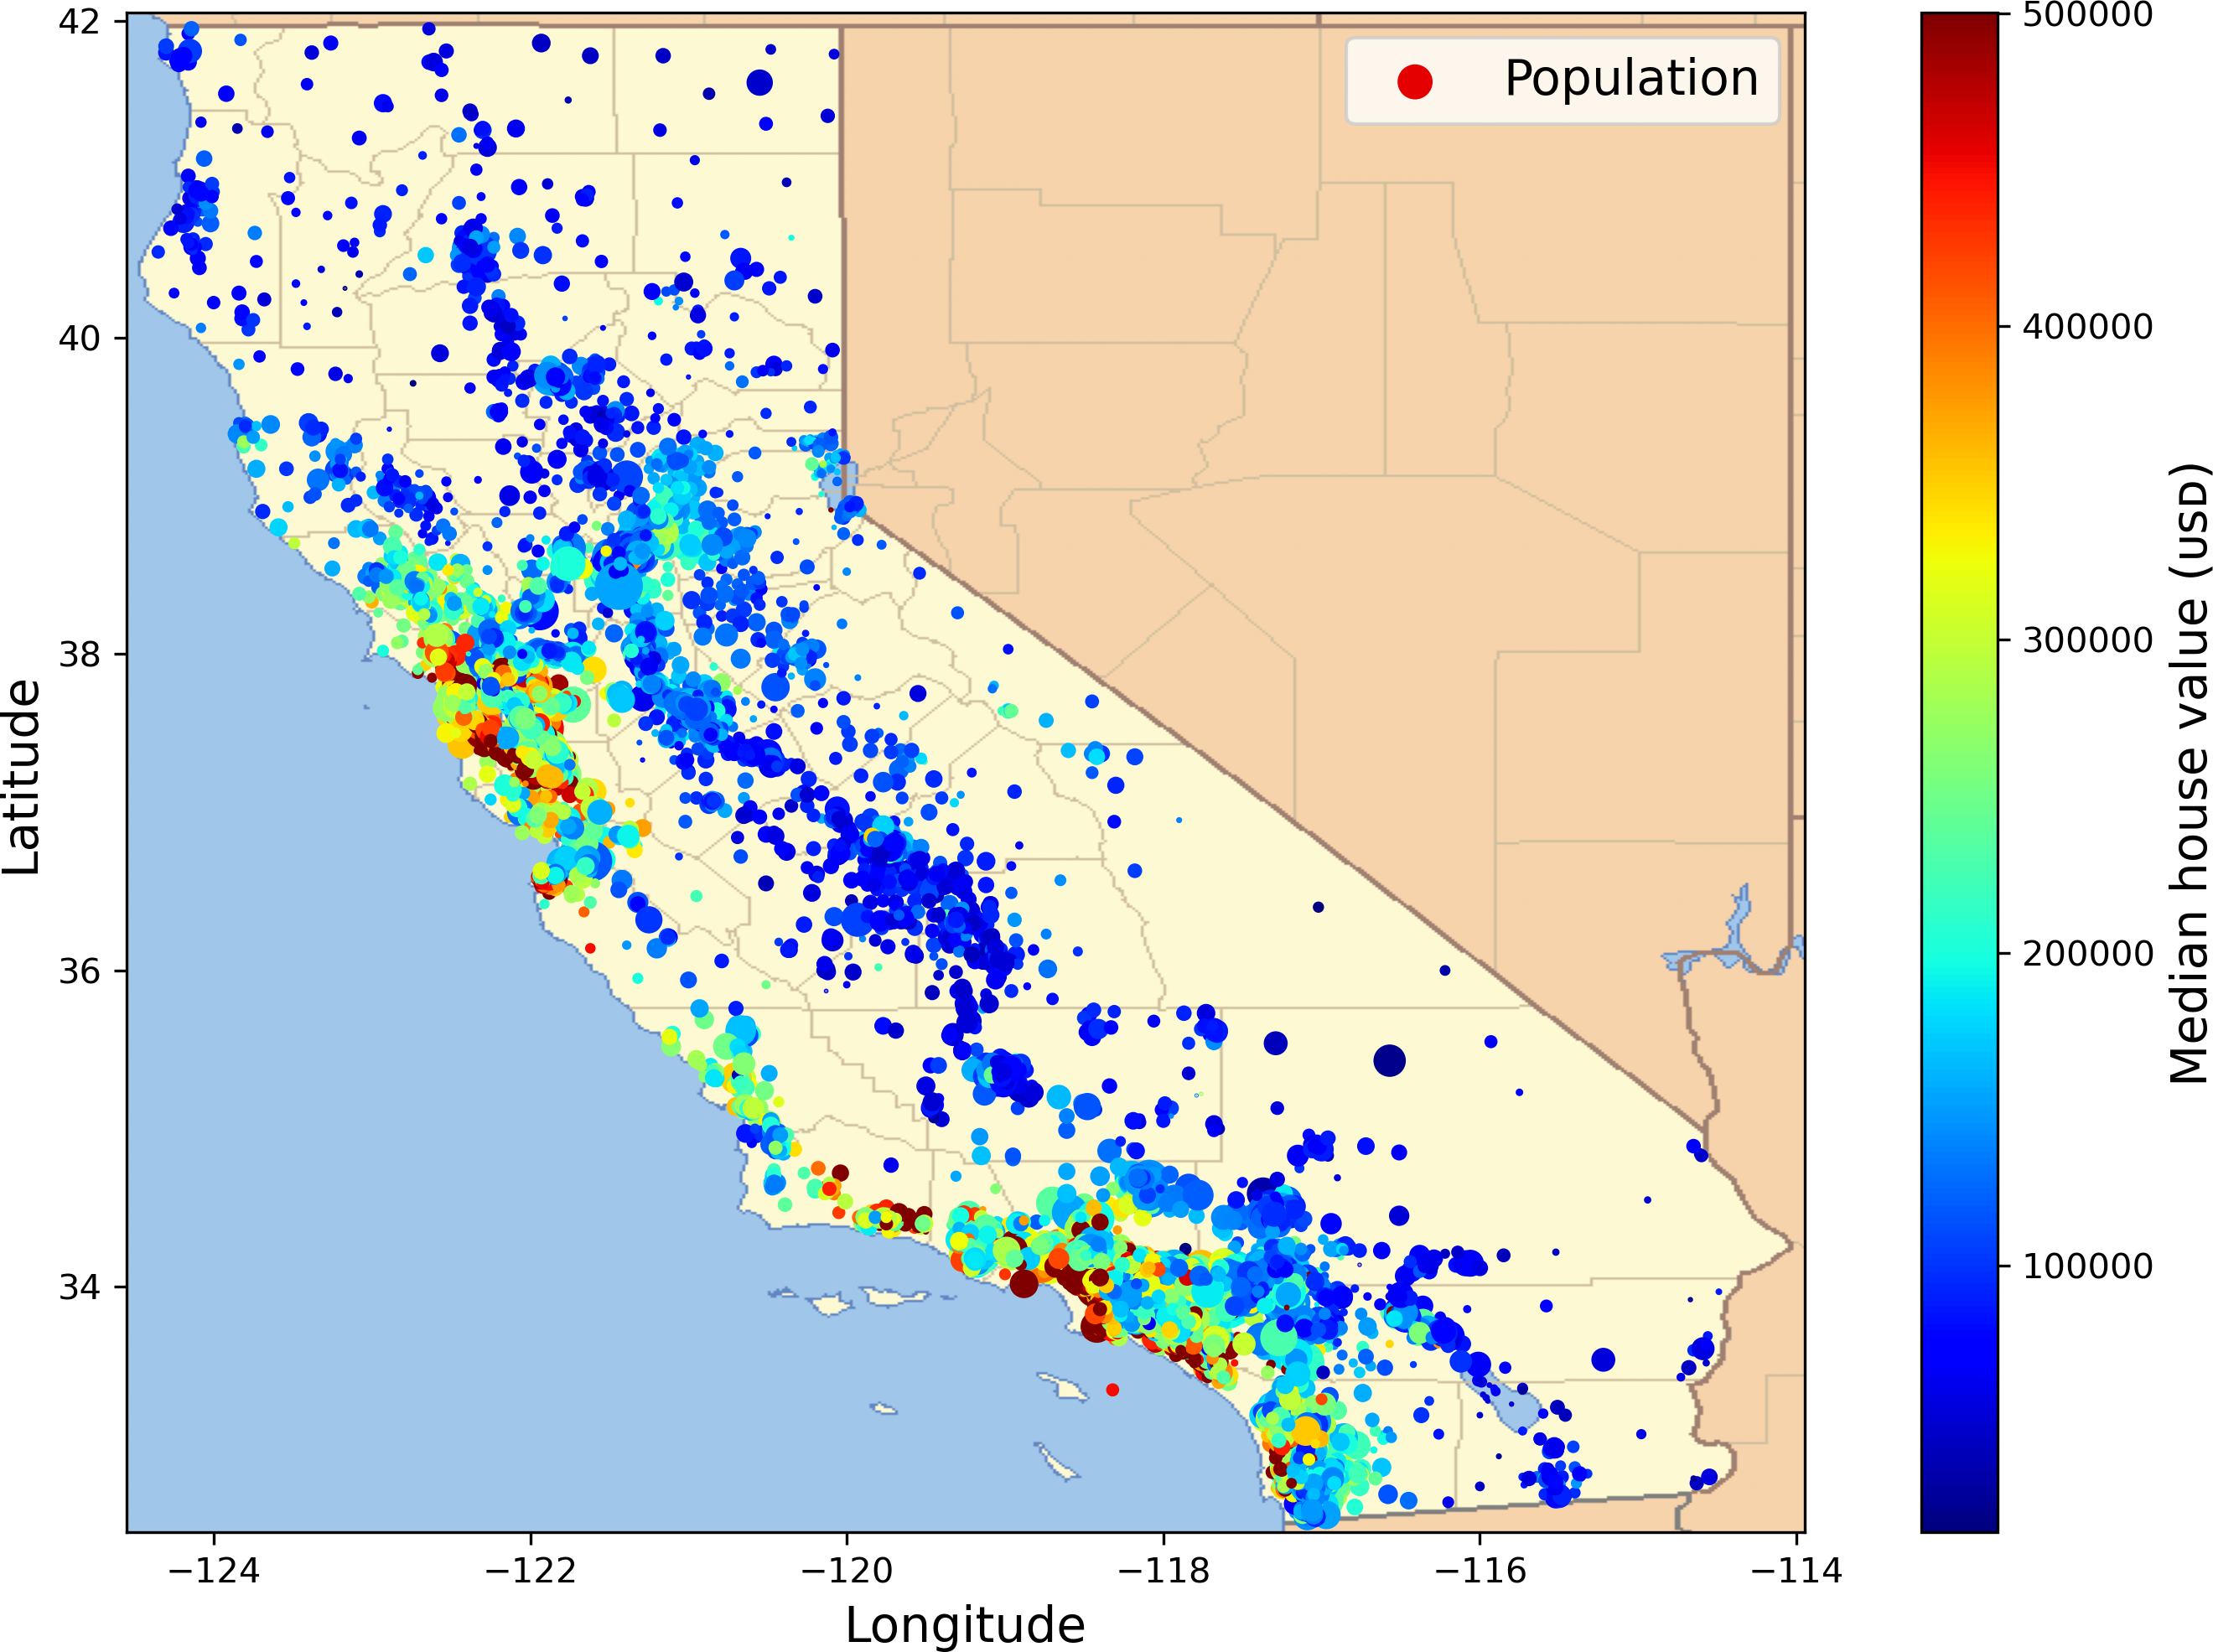

*California housing prices*

In [ ]:
from IPython.display import Image, display, Markdown
display(Image(filename="data/images/end_to_end_ml_project_01.png", width=500))
display(Markdown("*California housing prices*"))

## Frame the Problem

1. What exactly is the business objective? How does the company expect to use and benefit from this model?

    **Note:** *Knowing the objective is important because it will determine how you frame the problem, which algorithms you will select, which performance measure you will use to evaluate your model, and how much effort you will spend tweaking it.*
    
    **Answer:** Your boss answers that your model's output (a prediction of a district's median housing price) will be essential to determine whether it is worth investing in a given area. More specifically, your model's output will be fed to another machine learning system (see below figure), along with some other signals. So it's important to make our housing price model as accurate as we can.

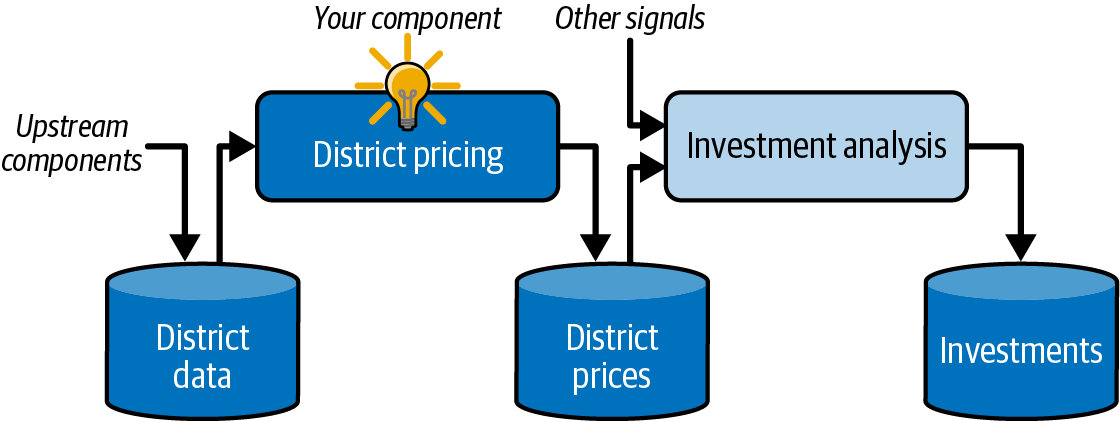

*A machine learning pipeline for real estate investments*

In [ ]:
from IPython.display import Image, display, Markdown
display(Image(filename="data/images/end_to_end_ml_project_02.png", width=500))
display(Markdown("*A machine learning pipeline for real estate investments*"))

2. What are the current solutions/workarounds (if any)?

    **Note:** *The current situation will often give you a reference for performance, as well as insights on how to solve the problem.*
    
    **Answer:** Your boss answers that the district housing prices are currently estimated manually by experts: a team gathers up-to-date information about a district, and when they cannot get the median housing price, they estimate it using complex rules.

    This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual median housing price, they often realize that their estimates were off by more than 30%. This is why the company thinks that it would be useful to train a model to predict a district’s median housing price, given other data about that district.

3. How should you frame this problem (supervised/unsupervised, classification task/regression task, online learning/offline learning, etc.)?

    **Answer:**
    * Learning Mode
        * Supervised learning
        * Regression task
            * System uses multiple features for prediction => Multiple regression problem
            * Predict only a single value => Univariate regression problem
    * Training Mode
        * No continuous data coming into the system => no need to rapidly adapt model to changing data
        * Data is small to fit in memory
        * Hence, Offline/Batch learning

## Select a Performance Measure

* A typical performance measure for regression problems => Root Mean Squared Error (RMSE)
    * Higher weight given to larger errors
    * Quite sensitive to outliers => Not preferred if many outliers in the data
    * Equation for RMSE is $\text{RMSE}(\textbf{X}, \textbf{y}, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} \left( h(\textbf{x}^{(i)}) - y^{(i)} \right)^2}$ where

        * $m$ => number of instances in the dataset
    
        * $\textbf{x}^{(i)}$ => vector of all the feature values (excluding the label) of the ${i}^{th}$ instance in the dataset
    
        * $y^{(i)}$ => label of ${i}^{th}$ instance in the dataset
    
        * $\textbf{X}$ is a matrix containing all the feature values (excluding labels) of all instances in the dataset. In matrix $\textbf{X}$, ${i}^{th}$ row is equal to $(\textbf{x}^{(i)})^{T}$, the transpose of $\textbf{x}^{(i)}$.
    
        * $h$ is the prediction function of the system; ${\widehat{y}}^{(i)} = h(\textbf{x}^{(i)})$
* Many outliers in the data => Can consider Mean Absolute Error (MAE)
    * Equation for MAE is $\text{MAE}(\textbf{X}, \textbf{y}, h) = \frac{1}{m} \sum_{i=1}^{m} \left| h(\textbf{x}^{(i)}) - y^{(i)} \right|$

**Note 1:** We use lowercase italic font for scalar values (such as $m$ or $y^{(i)}$) and function names (such as $h$), lowercase bold font for vectors (such as $\textbf{x}^{(i)}$), and uppercase bold font for matrices (such as $\textbf{X}$).

**Note 2:** $l_k$ norm of a vector $\textbf{v}$ containing $n$ elements is defined as $\left\| \textbf{v} \right\|_k = (\left| v_1 \right|^k + \left| v_2 \right|^k + ... + \left| v_n \right|^k)^{1/k}$. RMSE corresponds to $l_2$ norm or Euclidean norm while MAE corresponds to $l_1$ norm or Manhattan norm. $l_0$ gives the no of nonzero elements in the vector while $l_∞$ gives the maximum absolute value in the vector.

**Note 3:** When outliers are exponentially rare, the RMSE performs very well and is generally preferred.

## Check the Assumptions

**Note:** *It is good practice to list and verify the assumptions that have been made so far (by you or others); this can help you catch serious issues early on.*

For example, let the downstream ML system converts housing prices output by our ML system to three categories (cheap, medium & expensive) and then uses those categories instead of the prices themselves. In this case, getting the price perfectly right is not important at all; your system just needs to get the category right. Then the problem should have been framed as a classification task, not a regression task. You don't want to find this out after working on a regression system for months.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Get the Data

## Download the Data

* In most environments, data will be stored in a relational database or some other common data store & spread across multiple tables or files.
* Rather than manually downloading and decompressing the data, it's usually preferable to write a function that does it for you. This is useful in particular if the data changes regularly. You can also set up a scheduled job to do that automatically at regular intervals.

Function to fetch and load the data is given below:

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets", filter="data")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_full = load_housing_data()

## Take a Quick Look at the Data Structure

In [2]:
housing_full.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [3]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Note 1:** There are 20,640 instances in the dataset, which means that it is fairly small by machine learning standards, but it's perfect to get started. You notice that the `total_bedrooms` attribute has only 20,433 non-null values, meaning that 207 districts are missing this feature. You will need to take care of this later.

**Note 2:** All attributes are numerical, except for `ocean_proximity`. Its type is `object`, so it could hold any kind of Python object. It looks like a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the `value_counts()` method.

In [4]:
housing_full["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

The `describe()` method shows a summary of the numerical attributes.

In [5]:
housing_full.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. You can either plot this one attribute at a time, or you can call the `hist()` method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute. The number of value ranges can be adjusted using the `bins` argument.

In [6]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

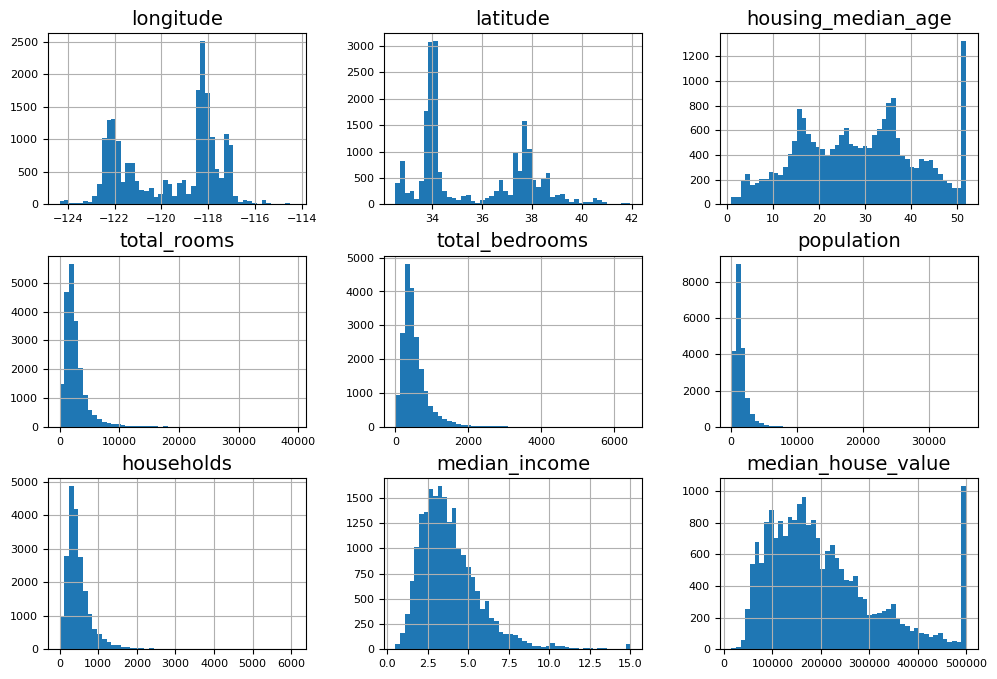

In [7]:
housing_full.hist(bins=50, figsize=(12, 8))
plt.show()

Looking at these histograms, you notice a few things:

* The `median_income` attribute is expressed in tens of thousands of dollars.
* The `median_income` attribute is scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes.
* The `housing_median_age` and the `median_house_value` were also capped. The `median_house_value` attribute may be a serious problem since it is your target attribute. Your machine learning algorithms may learn that prices never go beyond that limit. If we need precise predictions even beyond $500,000, then you have two options:
    * Collect proper labels for the districts whose labels were capped.
    * Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).
* Many histograms are skewed right: they extend much farther to the right of the median than to the left. This may make it a bit harder for some machine learning algorithms to detect patterns. Later, you'll try transforming these attributes to have more symmetrical and bell-shaped distributions.

## Create a Test Set

* Before you look at the data any further, you need to create a test set, put it aside, and never look at it. If you look at this test set, you may find some patterns in it and may select an ML model suited for this test set. Hence, your generalization error estimate will be too optimistic leading to an ML model not working well as expected in production. This is called Data Snooping Bias.
* Creating a test set is theoretically simple; pick some instances randomly, typically 20% of the dataset (or less if your dataset is very large), and set them aside.

### Random Split without seed

In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio, rng):
    shuffled_indices = rng.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
rng = np.random.default_rng()
train_set, test_set = shuffle_and_split_data(housing_full, 0.2, rng)
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16512
len(test_set): 4128


### Random Split with seed

Well, this works, but it is not perfect: if you run the program again, it will generate a different test set! Over time, you (or your machine learning algorithms) will get to see the whole dataset, which is what you want to avoid.

To ensure that this notebook's outputs remain the same every time we run it, we need to set the random number generator’s seed:

In [10]:
rng = np.random.default_rng(seed=42)
train_set, test_set = shuffle_and_split_data(housing_full, 0.2, rng)
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16512
len(test_set): 4128


### Deterministic Split using Hashing

* However, both these solutions will break the next time you fetch an updated dataset. We want a split that:
    * ✅ Is deterministic
    * ✅ Does not change when new data is added
    * ✅ Keeps old training data out of the test set forever
    * ✅ Automatically assigns ~20% of new data to test

* To have a stable train/test split even after updating the dataset, a common solution is to use each instance’s identifier to decide whether it should go in the test set (assuming instances have unique and immutable identifiers). For example, you could compute a hash of each instance’s identifier and put that instance in the test set if the hash is lower than or equal to 20% of the maximum hash value. This ensures that the test set will remain consistent across multiple runs, even if you refresh the dataset. The new test set will contain 20% of the new instances, but it will not contain any instance that was previously in the training set.

In [11]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

Unfortunately, the housing dataset does not have an identifier column. The simplest solution is to use the row index as the ID:

In [12]:
housing_with_id = housing_full.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16512
len(test_set): 4128


If you use the row index as a unique identifier, you need to make sure that new data gets appended to the end of the dataset and that no row ever gets deleted. If this is not possible, then you can try to use the most stable features to build a unique identifier. For example, a district’s latitude and longitude are guaranteed to be stable for a few million years, so you could combine them into an ID like so:⁠

In [13]:
housing_with_id["id"] = (housing_full["longitude"] * 1000
                         + housing_full["latitude"])
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")
print(f'len(train_set): {len(train_set)}')
print(f'len(test_set): {len(test_set)}')

len(train_set): 16322
len(test_set): 4318


**Note:** Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways. The simplest function is `train_test_split(),` which does pretty much the same thing as the `shuffle_and_split_data()` function we defined earlier, with a couple of additional features.

In [14]:
from sklearn.model_selection import train_test_split

train_set_, test_set_ = train_test_split(housing_full, test_size=0.2,
                                       random_state=42)
print(f'len(train_set_): {len(train_set_)}')
print(f'len(test_set_): {len(test_set_)}')

len(train_set_): 16512
len(test_set_): 4128


### Stratified Sampling

* Large dataset => Random sampling is fine
* Test set should be representative of the overall population => Stratified sampling preferred
* In Stratified sampling,
    * Population is divided into homogeneous subgroups called strata
    * A particular no of instances from each strata is included in test set based on the distribution of strata in the population

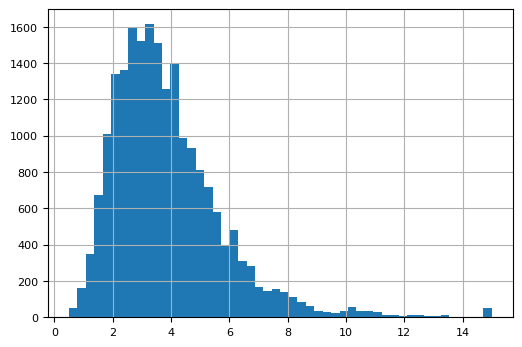

In [15]:
housing_full['median_income'].hist(bins=50, figsize=(6, 4))
plt.show()

* From expert opinions, `median_income` is a very important attribute to predict `median_house_value`. Hence, our test set should be representative of districts with all the ranges of median income.
* From the histogram of `median_income`, we can see that most districts have median income ranging from 1.5 to 6 (i.e. \$15000 to \$60000). We also have incomes below 1.5 and above 6. We need to create strata based on this.
* It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of a stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough.
* We create an income category attribute `income_cat` with five categories (labeled from 1 to 5).
    * Category 1 => 0 to 1.5
    * Category 2 => 1.5 to 3
    * Category 3 => 3 to 4.5
    * Category 4 => 4.5 to 6
    * Category 5 => 6 to ∞

In [16]:
housing_full['income_cat'] = pd.cut(housing_full['median_income'],
                                     bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                                     labels=[1, 2, 3, 4, 5])

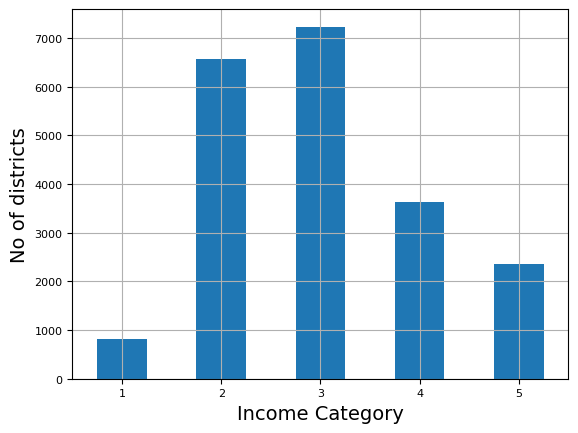

In [17]:
cat_counts = housing_full['income_cat'].value_counts().sort_index()
cat_counts.plot.bar(grid=True, rot=0)
plt.xlabel('Income Category')
plt.ylabel('No of districts')
plt.show()

Now you are ready to do stratified sampling based on the income category. Having multiple splits can be useful if you want to better estimate the performance of your model, as you will see when we discuss cross-validation.

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing_full,
                                              housing_full["income_cat"]):
    strat_train_set_n = housing_full.iloc[train_index]
    strat_test_set_n = housing_full.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

strat_train_set, strat_test_set = strat_splits[0]  # Use first split
print(f'len(strat_train_set): {len(strat_train_set)}')
print(f'len(strat_test_set): {len(strat_test_set)}')

len(strat_train_set): 16512
len(strat_test_set): 4128


There’s a shorter way to get a single split using the `train_test_split()` function with the `stratify` argument.

In [19]:
strat_train_set, strat_test_set = train_test_split(
    housing_full, test_size=0.2, stratify=housing_full["income_cat"], random_state=42
)
print(f'len(strat_train_set): {len(strat_train_set)}')
print(f'len(strat_test_set): {len(strat_test_set)}')

len(strat_train_set): 16512
len(strat_test_set): 4128


We can compare the income category proportions in the full dataset vs stratified test set vs random test set.

In [20]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

from sklearn.model_selection import train_test_split

train_set_, test_set_ = train_test_split(housing_full, test_size=0.2,
                                       random_state=42)

compare_props = pd.DataFrame({
    "Full Dataset %": income_cat_proportions(housing_full),
    "Stratified Test Set %": income_cat_proportions(strat_test_set),
    "Random Test Set %": income_cat_proportions(test_set_),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified Test Set %"] /
                                   compare_props["Full Dataset %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random Test Set %"] /
                                  compare_props["Full Dataset %"] - 1)
(compare_props * 100).round(2)

Full Dataset %  Stratified Test Set %  Random Test Set %  \
Income Category                                                             
1                          3.98                   4.00               4.24   
2                         31.88                  31.88              30.74   
3                         35.06                  35.05              34.52   
4                         17.63                  17.64              18.41   
5                         11.44                  11.43              12.09   

                 Strat. Error %  Rand. Error %  
Income Category                                 
1                          0.36           6.45  
2                         -0.02          -3.59  
3                         -0.01          -1.53  
4                          0.03           4.42  
5                         -0.08           5.63

As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is skewed.

You won’t use the `income_cat` column again, so you might as well drop it, reverting the data back to its original state:

In [21]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Explore and Visualize the Data to Gain Insights

Now, we need to dig deeper and get a really good understanding of the data. First, make sure you have put the test set aside and you are only exploring the training set. Also, if the training set is very large, you may want to sample an exploration set, to make manipulations easy and fast during the exploration phase. In this case, the training set is quite small, so you can just work directly on the full set. Since you’re going to experiment with various transformations of the full training set, you should make a copy of the original so you can revert to it afterwards:

In [22]:
housing = strat_train_set.copy()
print(f'len(housing): {len(housing)}')

len(housing): 16512


## Visualizing Geographical Data

Because the dataset includes geographical information (latitude and longitude), it is a good idea to create a scatterplot of all the districts to visualize the data:

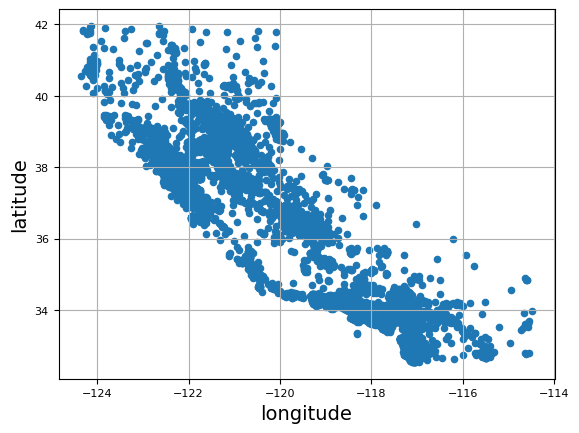

In [23]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.2 makes it much easier to visualize the places where there is a high density of data points.

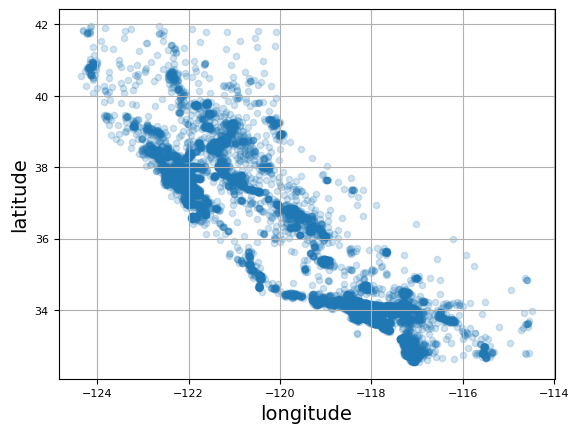

In [24]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Next, you look at the housing prices. The radius of each circle represents the district’s population (option `s`), and the color represents the price (option `c`). Here you use a predefined color map (option `cmap`) called `jet`, which ranges from blue (low values) to red (high prices):

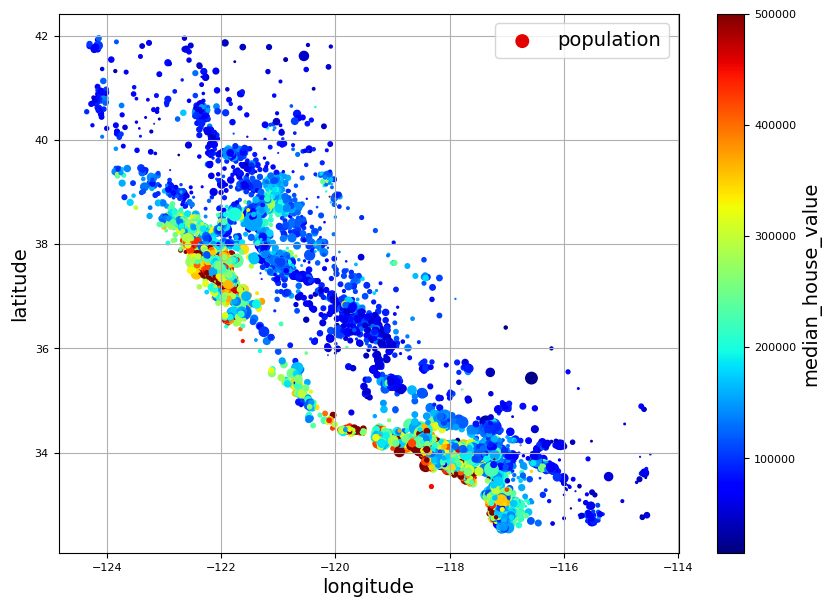

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
            s=housing["population"] / 100, label="population",
            c="median_house_value", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10, 7))

plt.show()

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density. A clustering algorithm should be useful for detecting the main cluster and for adding new features that measure the proximity to the cluster centers. The ocean proximity attribute may be useful as well, although in Northern California the housing prices in coastal districts are not too high, so it is not a simple rule.

## Look for Correlations

You can easily compute the *standard correlation coefficient* (also called Pearson's r) between every pair of numerical attributes using the `corr()` method:

In [26]:
corr_matrix = housing.corr(numeric_only=True)

Now you can look at how much each attribute correlates with the median house value:

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

* The correlation coefficient ranges from -1 to 1.
* Correlation coefficient close to 1 => strong positive correlation
    * Example: `median_house_value` tends to go up when the `median_income` goes up.
* Correlation coefficient close to -1 => strong negative correlation
    * Example: small negative correlation between `median_house_value` and `latitude` (i.e., prices have a slight tendency to go down when you go north).
* Correlation coefficient close to 0 => no linear correlation

Another way to check for correlation between attributes is to use the Pandas `scatter_matrix()` function, which plots every numerical attribute against every other numerical attribute.

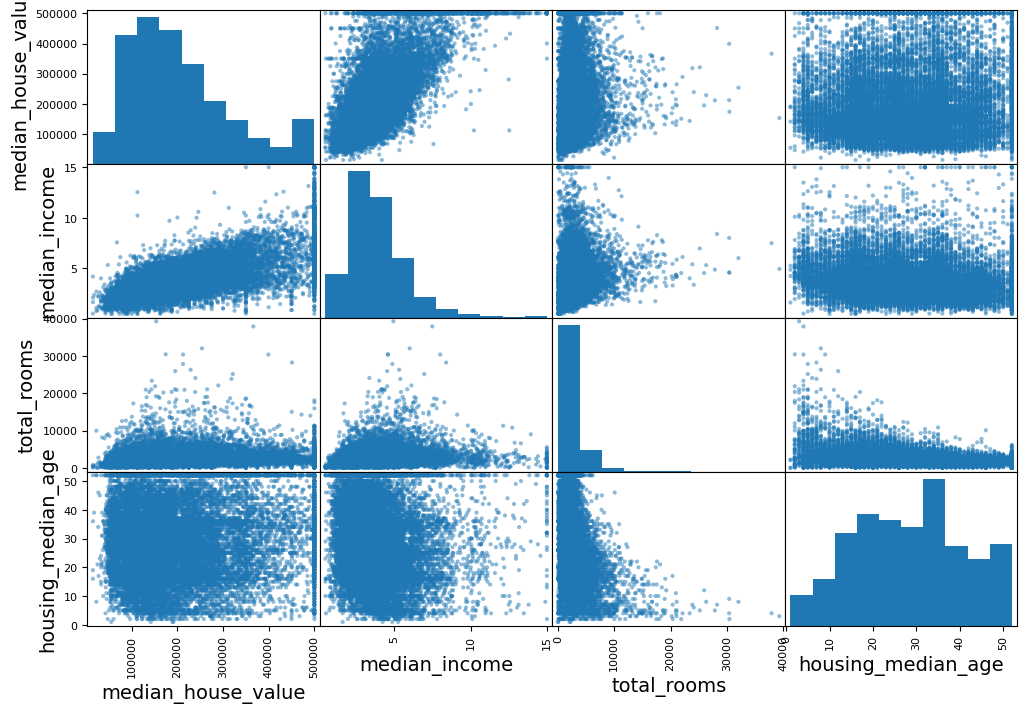

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
               "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

The main diagonal would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead, the Pandas displays a histogram of each attribute (other options are available; see the Pandas documentation for more details).

Looking at the correlation scatterplots, it seems like the most promising attribute to predict the `median_house_value` is the `median_income`.

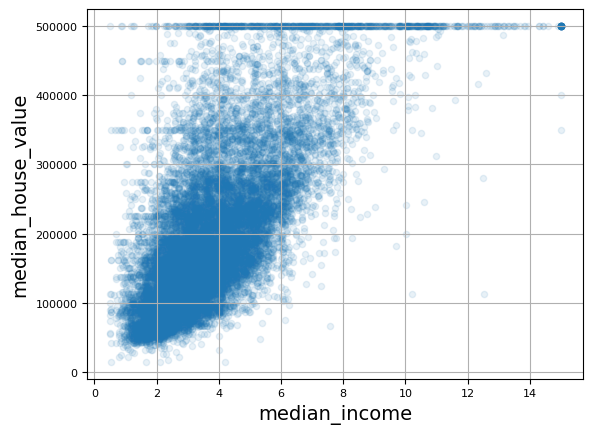

In [29]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, grid=True)
plt.show()

* This plot reveals a few things.
    * First, the correlation is indeed quite strong; you can clearly see the upward trend, although the data is noisy.
    * Second, the price cap you noticed earlier is clearly visible as a horizontal line at $500,000.
    * But the plot also reveals other less obvious straight lines: a horizontal line around $450,000, another around $350,000, perhaps one around $280,000, and a few more below that. You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks.

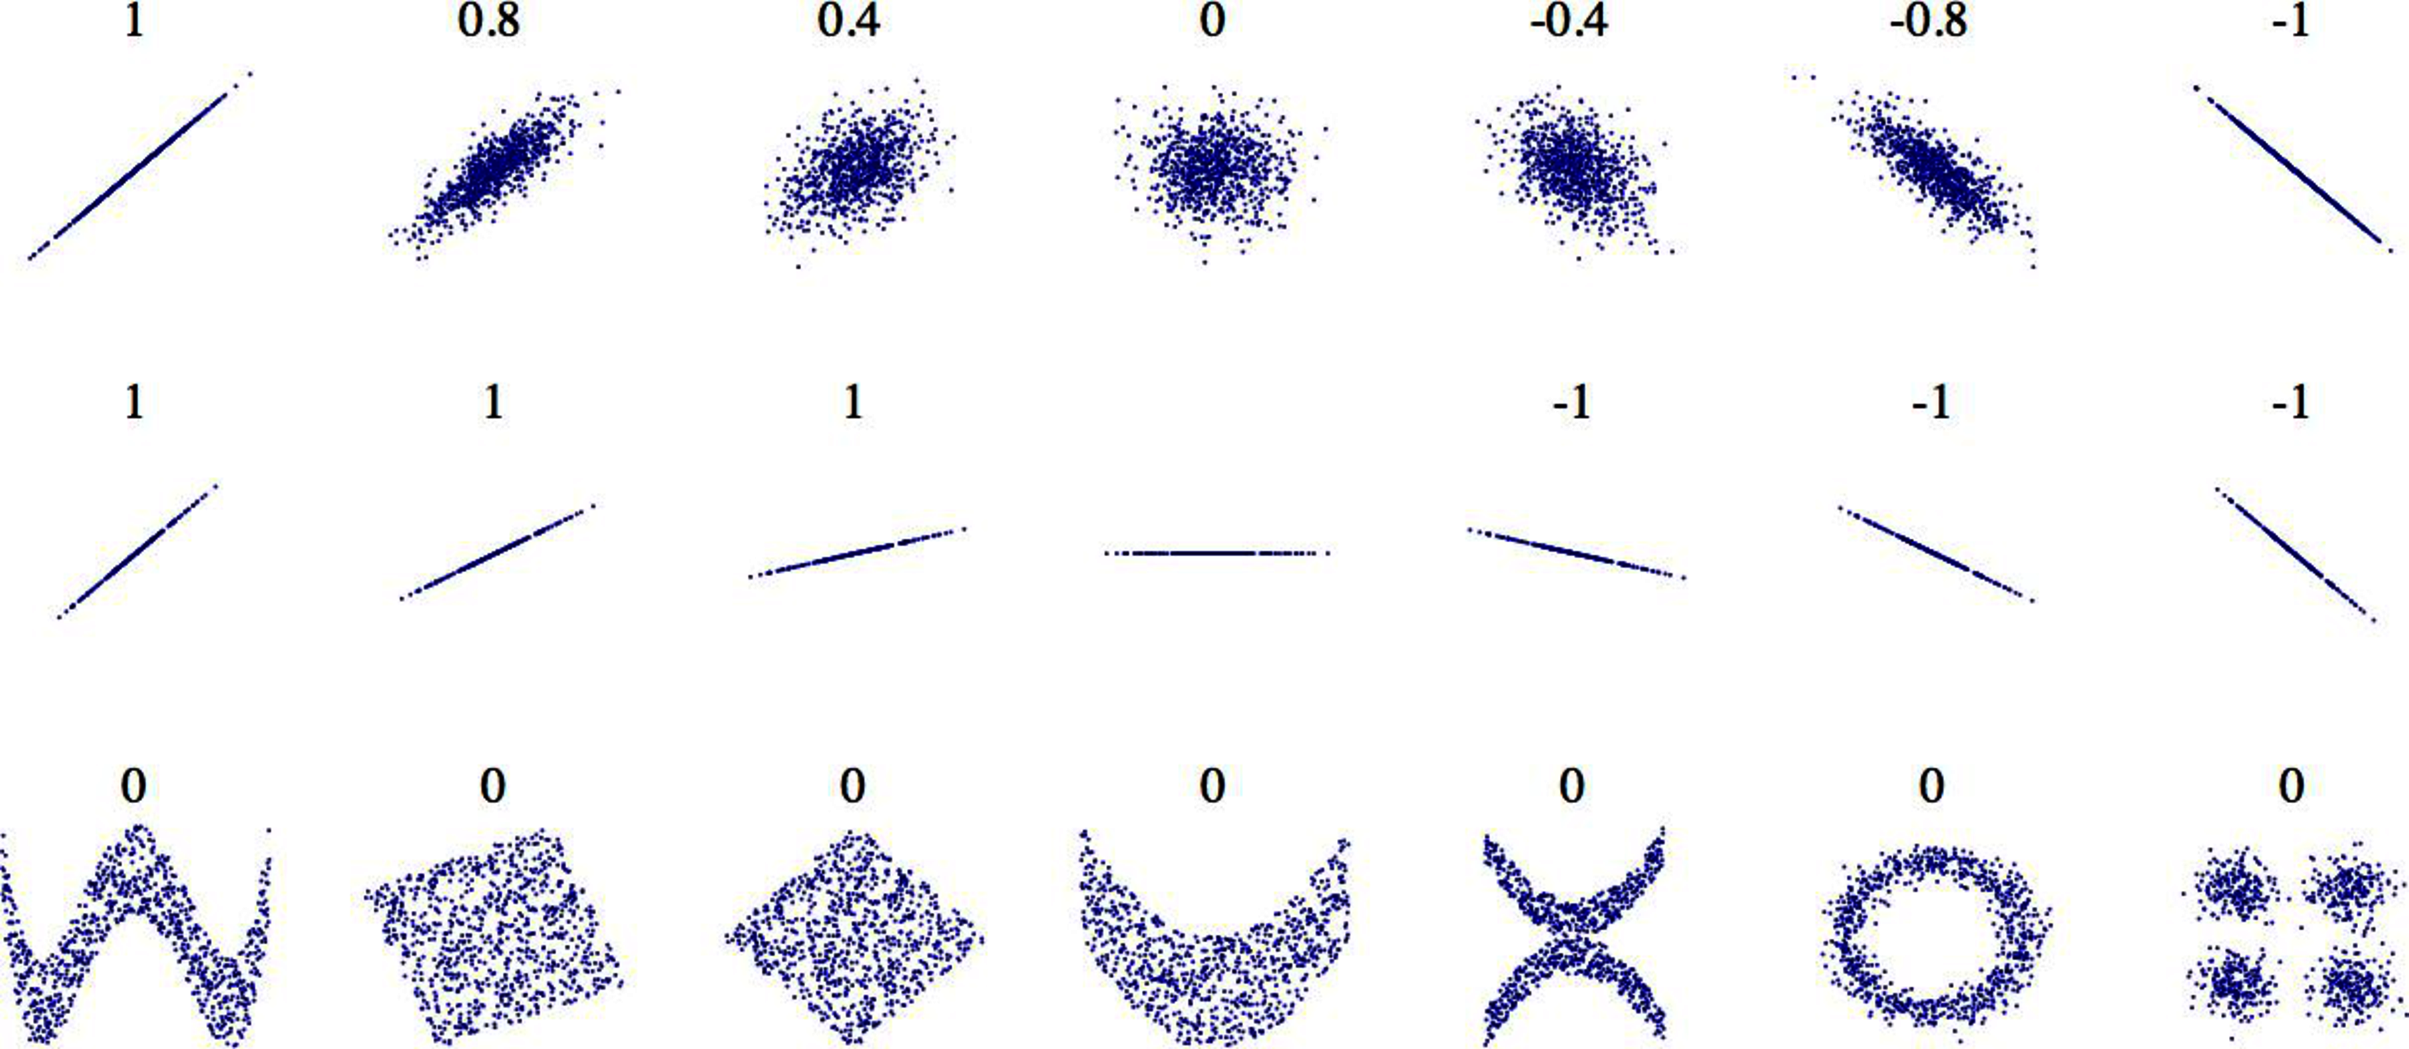

*Standard correlation coefficient of various datasets*

In [31]:
from IPython.display import Image, display, Markdown
display(Image(filename="data/images/end_to_end_ml_project_03.png", width=500))
display(Markdown("*Standard correlation coefficient of various datasets*"))

Note that the correlation coefficient only measures linear correlations (“as x goes up, y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “as x approaches 0, y generally goes up”). Figure above shows a variety of datasets along with their correlation coefficient. Note how all the plots of the bottom row have a correlation coefficient equal to 0, despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships. Also, the second row shows examples where the correlation coefficient is equal to 1 or -1; notice that this has nothing to do with the slope. For example, your height in inches has a correlation coefficient of 1 with your height in feet or in nanometers.

## Experiment with Attribute Combinations

One last thing you may want to do before preparing the data for machine learning algorithms is to try out various attribute combinations. For example, the total number of rooms in a district is not very useful if you don't know how many households there are. What you really want is the number of rooms per household. Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the total number of rooms. And the population per household also seems like an interesting attribute combination to look at. You create these new attributes as follows:

In [32]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

And then you look at the correlation matrix again:

In [33]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

The new `bedrooms_ratio` attribute is much more correlated with the median house value than the total number of rooms or bedrooms. It’s a strong negative correlation, so it looks like houses with a lower bedroom/room ratio tend to be more expensive. The number of rooms per household (`rooms_per_house`) is also more informative than the total number of rooms in a district (`total_rooms`) — obviously the larger the houses, the more expensive they are.

**Note**

*When creating new combined features, make sure they are not too linearly correlated with existing features: collinearity can cause issues with some models, such as linear regression. In particular, avoid simple weighted sums of existing features.*

**Note**

*This round of exploration does not have to be absolutely thorough; the point is to start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.*

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Prepare the Data for Machine Learning Algorithms

It’s time to prepare the data for your machine learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons:

* This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).

* You will gradually build a library of transformation functions that you can reuse in future projects.

* You can use these functions in your live system to transform the new data before feeding it to your algorithms.

* This will make it possible for you to easily try various transformations and see which combination of transformations works best.

But first, revert to a clean training set (by copying `strat_train_set` once again). You should also separate the predictors and the labels, since you don’t necessarily want to apply the same transformations to the predictors and the target values (note that `drop()` creates a copy of the data and does not affect `strat_train_set` unless you pass `inplace=True`):

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Clean the Data

Most machine learning algorithms cannot work with missing features, so you’ll need to take care of these. For example, you noticed earlier that the `total_bedrooms` attribute has some missing values. You have three options to fix this:

1. Get rid of the corresponding districts.

2. Get rid of the whole attribute.

3. Set the missing values to some value (zero, the mean, the median, etc.). This is called imputation.

You can accomplish these easily using the Pandas DataFrame’s `dropna()`, `drop()`, and `fillna()` methods:

In [ ]:
housing.dropna(subset=["total_bedrooms"], inplace=True)  # Option 1

housing.drop("total_bedrooms", axis=1, inplace=True)  # Option 2

median = housing["total_bedrooms"].median()
housing["total_bedrooms"] = housing["total_bedrooms"].fillna(median)  # Option 3

For each option, we'll create a copy of `housing` and work on that copy to avoid breaking `housing`. We'll also show the output of each option, filtering on the rows that originally contained a NaN value.

In [35]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0             NaN   
18217    -117.96     34.03                35.0       2093.0             NaN   
11889    -118.05     34.04                33.0       1348.0             NaN   
20325    -118.88     34.17                15.0       4260.0             NaN   
14360    -117.87     33.62                 8.0       1266.0             NaN   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

In [36]:
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
housing_option1.loc[null_rows_idx].head()

Empty DataFrame
Columns: [longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity]
Index: []

In [37]:
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)
housing_option2.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  population  \
14452    -120.67     40.50                15.0       5343.0      2503.0   
18217    -117.96     34.03                35.0       2093.0      1755.0   
11889    -118.05     34.04                33.0       1348.0      1098.0   
20325    -118.88     34.17                15.0       4260.0      1701.0   
14360    -117.87     33.62                 8.0       1266.0       375.0   

       households  median_income ocean_proximity  
14452       902.0         3.5962          INLAND  
18217       403.0         3.4115       <1H OCEAN  
11889       257.0         4.2917       <1H OCEAN  
20325       669.0         5.1033       <1H OCEAN  
14360       183.0         9.8020       <1H OCEAN

In [39]:
housing_option3 = housing.copy()
median = housing_option3["total_bedrooms"].median()
housing_option3["total_bedrooms"] = housing_option3["total_bedrooms"].fillna(median)
housing_option3.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income ocean_proximity  
14452      2503.0       902.0         3.5962          INLAND  
18217      1755.0       403.0         3.4115       <1H OCEAN  
11889      1098.0       257.0         4.2917       <1H OCEAN  
20325      1701.0       669.0         5.1033       <1H OCEAN  
14360       375.0       183.0         9.8020       <1H OCEAN

You decide to go for option 3 since it is the least destructive, but instead of the preceding code, you will use a handy Scikit-Learn class: `SimpleImputer`. The benefit is that it will store the median value of each feature: this will make it possible to impute missing values not only on the training set, but also on the validation set, the test set, and any new data fed to the model. To use it, first you need to create a `SimpleImputer` instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [40]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you then need to create a copy of the data with only the numerical attributes (this will exclude the text attribute `ocean_proximity`):

In [41]:
housing_numerical = housing.select_dtypes(include=[np.number])

Now you can fit the `imputer` instance to the training data using the `fit()` method:

In [42]:
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

The `imputer` has simply computed the median of each attribute and stored the result in its `statistics_` instance variable. Only the `total_bedrooms` attribute had missing values, but you cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the `imputer` to all the numerical attributes:

In [43]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Check that this is the same as manually computing the median of each attribute:

In [44]:
housing_numerical.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Now you can use this “trained” `imputer` to transform the training set by replacing missing values with the learned medians:

In [45]:
X = imputer.transform(housing_numerical)

In [46]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

Missing values can also be replaced with the mean value (`strategy="mean"`), or with the most frequent value (`strategy="most_frequent"`), or with a constant value (`strategy="constant", fill_value=…​`). The last two strategies support non-numerical data.

Scikit-Learn transformers output NumPy arrays (or sometimes SciPy sparse matrices) even when they are fed Pandas DataFrames as input. So, the output of `imputer.transform(housing_numerical)` is a NumPy array: `X` has neither column names nor index. Luckily, it’s not too hard to wrap `X` in a DataFrame and recover the column names and index from `housing_numerical`:

In [47]:
housing_tr = pd.DataFrame(X, columns=housing_numerical.columns, index=housing_numerical.index)
housing_tr.loc[null_rows_idx].head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14452    -120.67     40.50                15.0       5343.0           434.0   
18217    -117.96     34.03                35.0       2093.0           434.0   
11889    -118.05     34.04                33.0       1348.0           434.0   
20325    -118.88     34.17                15.0       4260.0           434.0   
14360    -117.87     33.62                 8.0       1266.0           434.0   

       population  households  median_income  
14452      2503.0       902.0         3.5962  
18217      1755.0       403.0         3.4115  
11889      1098.0       257.0         4.2917  
20325      1701.0       669.0         5.1033  
14360       375.0       183.0         9.8020

**Note**

There are also more powerful imputers available in the `sklearn.impute` package (both for numerical features only):

* `KNNImputer` replaces each missing value with the mean of the k-nearest neighbors’ values for that feature. The distance is based on all the available features.

* `IterativeImputer` trains a regression model per feature to predict the missing values based on all the other available features. It then trains the model again on the updated data, and repeats the process several times, improving the models and the replacement values at each iteration.

### Scikit-Learn Design

Scikit-Learn’s API is remarkably well designed. These are the main design principles:
* Consistency
    * All objects share a consistent and simple interface:
        * Estimators
            
            Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a `SimpleImputer` is an estimator). The estimation itself is performed by the `fit()` method, and it takes a dataset as a parameter, or two for supervised learning algorithms - the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a `SimpleImputer`’s `strategy`), and it must be set as an instance variable (generally via a constructor parameter).

        * Transformers
        
            Some estimators (such as a `SimpleImputer`) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a `SimpleImputer`. All transformers also have a convenience method called `fit_transform()`, which is equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster).

        * Predictors

            Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. A predictor has a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a `score()` method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).

* Inspection
    * All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., `imputer.strategy`), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., `imputer.statistics_`).

* Nonproliferation of classes
    * Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

* Composition
    * Existing building blocks are reused as much as possible. For example, it is easy to create a `Pipeline` estimator from an arbitrary sequence of transformers followed by a final estimator, as you will see.

* Sensible defaults
    * Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.

## Handling Text and Categorical Attributes

So far we have only dealt with numerical attributes, but your data may also contain text attributes. In this dataset, there is just one: the `ocean_proximity` attribute. Let’s look at its value for the first few instances:

In [48]:
housing_categorical = housing[["ocean_proximity"]]
housing_categorical.head(10)

ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN
1286           INLAND
18078       <1H OCEAN
4396         NEAR BAY
18031       <1H OCEAN
6753        <1H OCEAN

`ocean_proximity` is a categorical attribute with a limited number of possible values. Most machine learning algorithms prefer to work with numbers, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s `OrdinalEncoder` class:

In [50]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)

Here’s what the first few encoded values in `housing_categorical_encoded` look like:

In [51]:
housing_categorical_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

You can get the list of categories using the `categories_` instance variable. It is a list containing a 1D array of categories for each categorical attribute (in this case, a list containing a single array since there is just one categorical attribute):

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, and “excellent”), but it is obviously not the case for the `ocean_proximity` column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is `"<1H OCEAN"` (and 0 otherwise), another attribute equal to 1 when the category is `"INLAND"` (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a `OneHotEncoder` class to convert categorical values into one-hot vectors:

In [53]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_categorical_1hot = cat_encoder.fit_transform(housing_categorical)

By default, the output of a `OneHotEncoder` is a SciPy sparse matrix, instead of a NumPy array:

In [54]:
housing_categorical_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

A sparse matrix is a very efficient representation for matrices that contain mostly zeros. Indeed, internally it only stores the nonzero values and their positions. When a categorical attribute has hundreds or thousands of categories, one-hot encoding it results in a very large matrix full of 0s except for a single 1 per row. In this case, a sparse matrix is exactly what you need: it will save plenty of memory and speed up computations. You can use a sparse matrix mostly like a normal 2D array, but if you want to convert it to a (dense) NumPy array, just call the `toarray()` method:

In [55]:
housing_categorical_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Alternatively, you can set `sparse_output=False` when creating the `OneHotEncoder`, in which case the `transform()` method will return a regular (dense) NumPy array directly:

In [56]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_categorical_1hot = cat_encoder.fit_transform(housing_categorical)  # Now a dense array
housing_categorical_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

As with the `OrdinalEncoder`, you can get the list of categories using the encoder’s `categories_` instance variable:

In [57]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Pandas has a function called `get_dummies()`, which also converts each categorical feature into a one-hot representation, with one binary feature per category. The advantage of `OneHotEncoder` is that it remembers which categories it was trained on. This is very important because once your model is in production, it should be fed exactly the same features as during training: no more, no less. `OneHotEncoder` is smarter: it will detect any unknown category and raise an exception. If you prefer, you can set the `handle_unknown` hyperparameter to `"ignore"`, in which case it will just represent the unknown category with zeros (`cat_encoder.handle_unknown = "ignore"`).

In [60]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

ocean_proximity_<2H OCEAN  ocean_proximity_ISLAND
0                       True                   False
1                      False                    True

In [61]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

When you fit any Scikit-Learn estimator using a DataFrame, the estimator stores the column names in the `feature_names_in_` attribute. Scikit-Learn then ensures that any DataFrame fed to this estimator after that (e.g., to `transform()` or `predict()`) has the same column names. Transformers also provide a `get_feature_names_out()` method that you can use to build a DataFrame around the transformer’s output:

In [58]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [59]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [62]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown), columns=cat_encoder.get_feature_names_out(), index=df_test_unknown.index)
df_output

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                        0.0                     0.0                     0.0   
1                        0.0                     0.0                     1.0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                       0.0                         0.0  
1                       0.0                         0.0

This feature helps avoid column mismatches, and it’s also quite useful when debugging.

**TIP**

If a categorical attribute has a large number of possible categories (e.g., country code, profession, species), then one-hot encoding will result in a large number of input features. This may slow down training and degrade performance. If this happens, you may want to replace the categorical input with useful numerical features related to the categories: for example, you could replace the `ocean_proximity` feature with the distance to the ocean (similarly, a country code could be replaced with the country’s population and GDP per capita). Alternatively, you can use one of the encoders provided by the `category_encoders` package on [GitHub](https://github.com/scikit-learn-contrib/category_encoders). Or, when dealing with neural networks, you can replace each category with a learnable, low-dimensional vector called an embedding.

## Feature Scaling and Transformation

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# References

- **Hands-On Machine Learning with Scikit-Learn and PyTorch by Aurélien Géron**

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)